<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

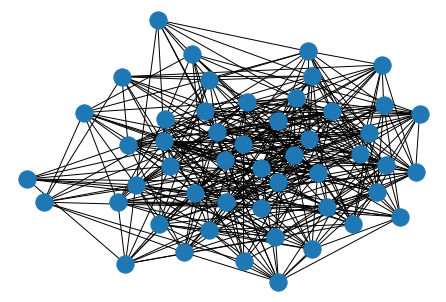

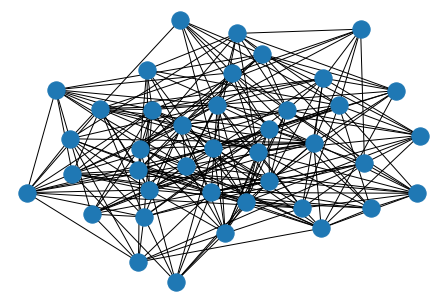

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 1 0 0]
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.96,.02,.02), k=1)[0]
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = P1
                        P2 = P2/3
                        P3 = P3/3
                      elif max(P1,P2,P3) == P2:
                        P1 = P1
                        P2 = P2
                        P3 = P1/2
                      else:
                        P1 = P1
                        P2 = P2/2
                        P3 = P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305, 2972, 2664, 2377, 2170, 1996, 1877, 1771, 1696, 1639, 1598, 1567, 1552, 1537, 1521, 1511, 1507, 1499, 1495, 1493, 1491, 1488, 1487, 1487, 1487, 1486, 1486, 1486, 1484, 1483, 1483, 1482, 1482, 1482, 1482, 1482]
[207, 414, 722, 1044, 1178, 1323, 1349, 1411, 1469, 1501, 1560, 1612, 1671, 1727, 1806, 1825, 1796, 1730, 1591, 1444, 1302, 1135, 976, 787, 606, 474, 357, 279, 204, 144, 102, 77, 56, 45, 38, 26, 18, 16, 11, 8, 6, 4, 2, 1, 1, 3, 3, 3, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 207, 414, 722, 1044, 1385, 1737, 2071, 2455, 2854, 3238, 3631, 4067, 4525, 4965, 5437, 5892, 6321, 6695, 7028, 7336, 7623, 7830, 8004, 8123, 8229, 8304, 8361, 8402, 8433, 8448, 8463, 8479, 8489, 8493, 8501, 8505, 8507, 8509, 8512, 8513, 8513, 8513, 8514, 8514, 8514, 8516, 8517, 8517, 8518]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

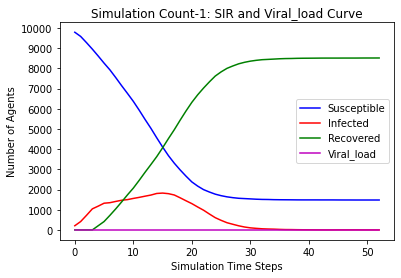

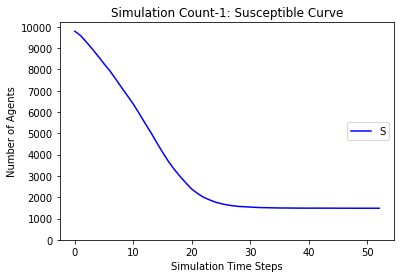

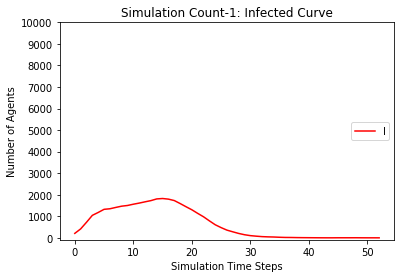

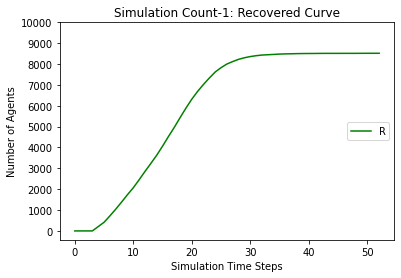

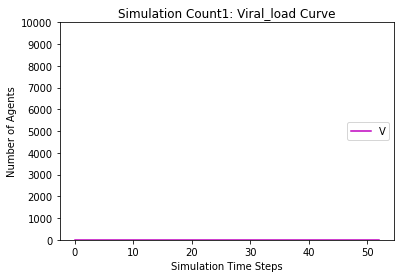

[9793, 9586, 9313, 9007, 8675, 8305, 7832, 7348, 6850, 6336, 5835, 5320, 4778, 4172, 3647, 3188, 2789, 2383, 2091, 1871, 1697, 1571, 1477, 1404, 1359, 1304, 1284, 1268, 1257, 1249, 1243, 1237, 1231, 1228, 1222, 1221, 1221, 1221, 1221, 1221]
[207, 414, 687, 993, 1118, 1281, 1481, 1659, 1825, 1969, 1997, 2028, 2072, 2164, 2188, 2132, 1989, 1789, 1556, 1317, 1092, 812, 614, 467, 338, 267, 193, 136, 102, 55, 41, 31, 26, 21, 21, 16, 10, 7, 1, 0]
[0, 0, 0, 0, 207, 414, 687, 993, 1325, 1695, 2168, 2652, 3150, 3664, 4165, 4680, 5222, 5828, 6353, 6812, 7211, 7617, 7909, 8129, 8303, 8429, 8523, 8596, 8641, 8696, 8716, 8732, 8743, 8751, 8757, 8763, 8769, 8772, 8778, 8779]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305, 2972, 2664, 237

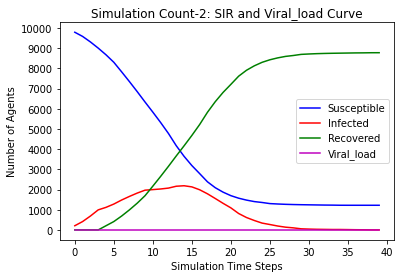

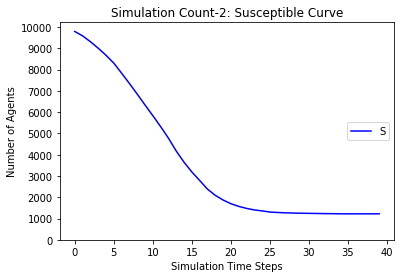

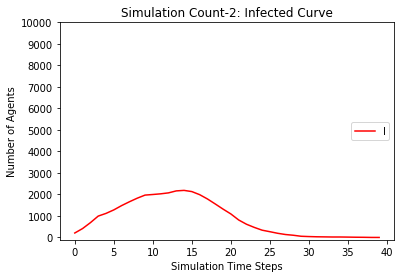

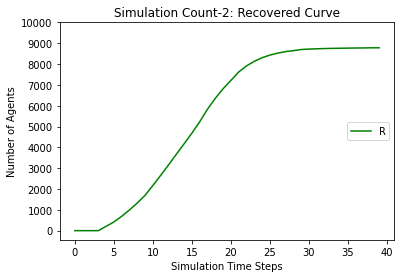

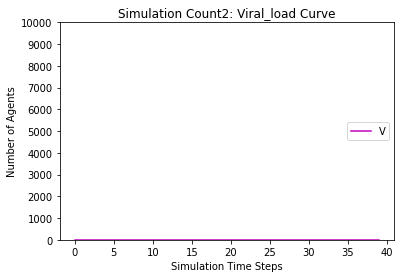

[9793, 9568, 9277, 8948, 8610, 8307, 7889, 7382, 6819, 6230, 5624, 5033, 4408, 3824, 3288, 2797, 2433, 2135, 1931, 1746, 1611, 1510, 1433, 1378, 1337, 1317, 1300, 1292, 1277, 1270, 1267, 1263, 1261, 1260, 1259, 1258, 1258, 1258, 1258, 1257, 1257, 1257, 1257, 1257]
[207, 432, 723, 1052, 1183, 1261, 1388, 1566, 1791, 2077, 2265, 2349, 2411, 2406, 2336, 2236, 1975, 1689, 1357, 1051, 822, 625, 498, 368, 274, 193, 133, 86, 60, 47, 33, 29, 16, 10, 8, 5, 3, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 207, 432, 723, 1052, 1390, 1693, 2111, 2618, 3181, 3770, 4376, 4967, 5592, 6176, 6712, 7203, 7567, 7865, 8069, 8254, 8389, 8490, 8567, 8622, 8663, 8683, 8700, 8708, 8723, 8730, 8733, 8737, 8739, 8740, 8741, 8742, 8742, 8742, 8742, 8743]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545,

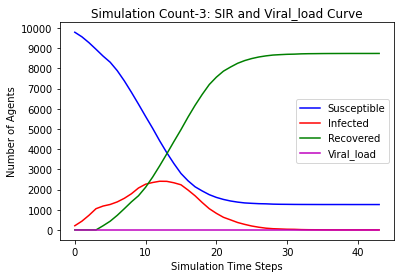

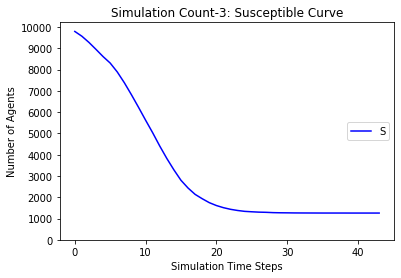

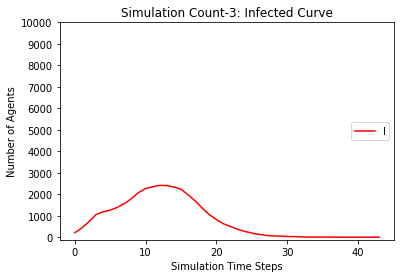

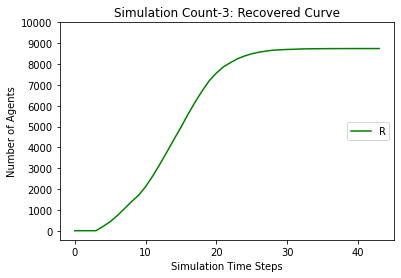

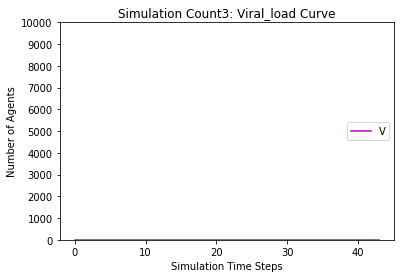

[9793, 9597, 9306, 9007, 8723, 8473, 8114, 7678, 7194, 6655, 6095, 5560, 5035, 4480, 3985, 3518, 3088, 2706, 2402, 2163, 1976, 1831, 1728, 1645, 1584, 1535, 1499, 1474, 1455, 1440, 1434, 1427, 1423, 1420, 1420, 1418, 1417, 1417, 1417, 1417, 1417]
[207, 403, 694, 993, 1070, 1124, 1192, 1329, 1529, 1818, 2019, 2118, 2159, 2175, 2110, 2042, 1947, 1774, 1583, 1355, 1112, 875, 674, 518, 392, 296, 229, 171, 129, 95, 65, 47, 32, 20, 14, 9, 6, 3, 3, 1, 0]
[0, 0, 0, 0, 207, 403, 694, 993, 1277, 1527, 1886, 2322, 2806, 3345, 3905, 4440, 4965, 5520, 6015, 6482, 6912, 7294, 7598, 7837, 8024, 8169, 8272, 8355, 8416, 8465, 8501, 8526, 8545, 8560, 8566, 8573, 8577, 8580, 8580, 8582, 8583]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 330

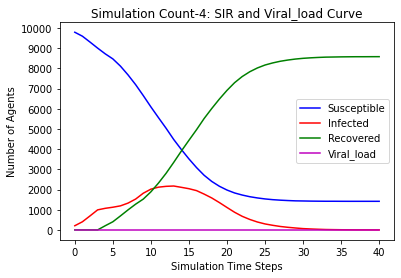

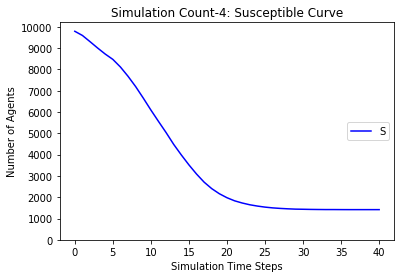

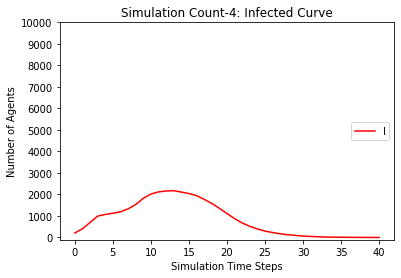

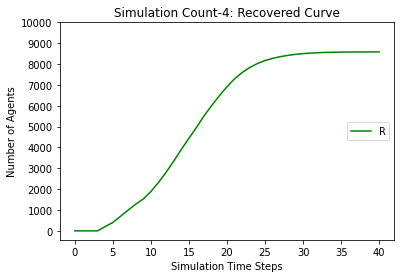

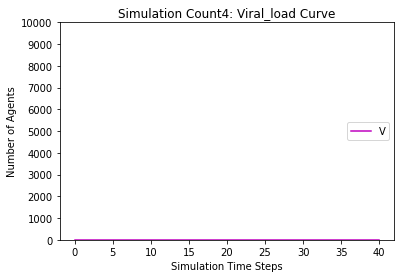

[9793, 9597, 9312, 8981, 8577, 8160, 7672, 7166, 6617, 6085, 5478, 4876, 4323, 3765, 3230, 2737, 2327, 2006, 1787, 1593, 1440, 1348, 1269, 1210, 1166, 1136, 1112, 1095, 1084, 1074, 1066, 1061, 1060, 1059, 1058, 1058, 1058, 1058, 1058]
[207, 403, 688, 1019, 1216, 1437, 1640, 1815, 1960, 2075, 2194, 2290, 2294, 2320, 2248, 2139, 1996, 1759, 1443, 1144, 887, 658, 518, 383, 274, 212, 157, 115, 82, 62, 46, 34, 24, 15, 8, 3, 2, 1, 0]
[0, 0, 0, 0, 207, 403, 688, 1019, 1423, 1840, 2328, 2834, 3383, 3915, 4522, 5124, 5677, 6235, 6770, 7263, 7673, 7994, 8213, 8407, 8560, 8652, 8731, 8790, 8834, 8864, 8888, 8905, 8916, 8926, 8934, 8939, 8940, 8941, 8942]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305, 2972, 2664, 2377, 2170, 1996, 1877, 17

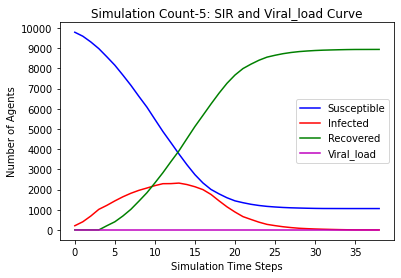

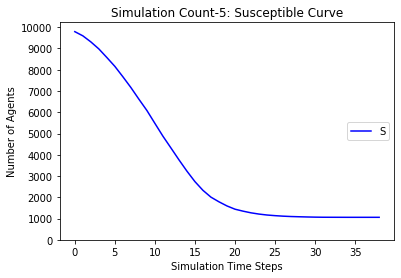

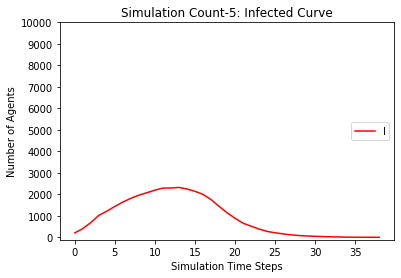

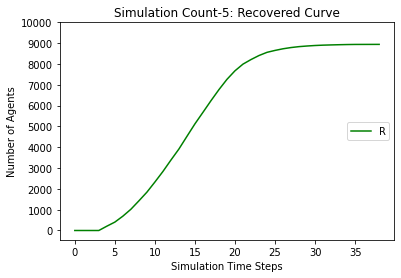

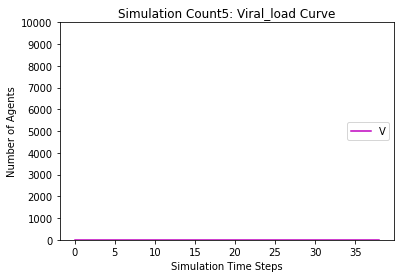

[9793, 9585, 9277, 8957, 8613, 8295, 7945, 7564, 7159, 6724, 6239, 5753, 5265, 4837, 4429, 4047, 3619, 3247, 2901, 2613, 2401, 2237, 2103, 2005, 1920, 1859, 1816, 1790, 1773, 1755, 1740, 1730, 1728, 1720, 1718, 1717, 1717, 1715, 1714, 1714, 1714, 1713, 1713, 1713, 1713, 1713]
[207, 415, 723, 1043, 1180, 1290, 1332, 1393, 1454, 1571, 1706, 1811, 1894, 1887, 1810, 1706, 1646, 1590, 1528, 1434, 1218, 1010, 798, 608, 481, 378, 287, 215, 147, 104, 76, 60, 45, 35, 22, 13, 11, 5, 4, 3, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 207, 415, 723, 1043, 1387, 1705, 2055, 2436, 2841, 3276, 3761, 4247, 4735, 5163, 5571, 5953, 6381, 6753, 7099, 7387, 7599, 7763, 7897, 7995, 8080, 8141, 8184, 8210, 8227, 8245, 8260, 8270, 8272, 8280, 8282, 8283, 8283, 8285, 8286, 8286, 8286, 8287]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], 

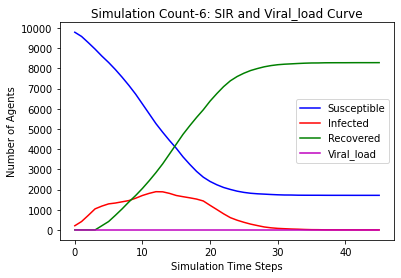

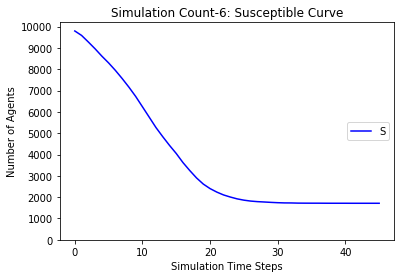

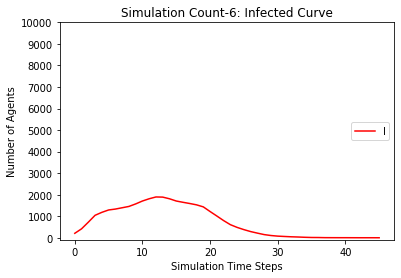

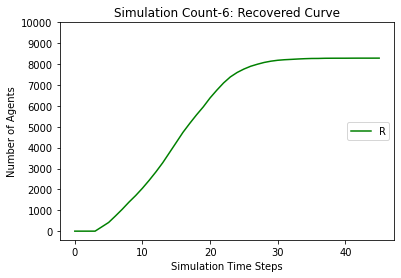

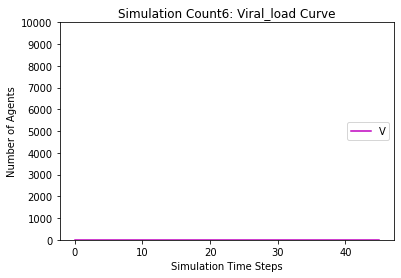

[9793, 9585, 9288, 8929, 8573, 8152, 7703, 7208, 6600, 5898, 5285, 4727, 4211, 3635, 3212, 2852, 2534, 2300, 2058, 1896, 1778, 1669, 1584, 1519, 1482, 1454, 1432, 1416, 1410, 1404, 1400, 1397, 1396, 1396, 1395, 1395, 1395, 1395, 1395]
[207, 415, 712, 1071, 1220, 1433, 1585, 1721, 1973, 2254, 2418, 2481, 2389, 2263, 2073, 1875, 1677, 1335, 1154, 956, 756, 631, 474, 377, 296, 215, 152, 103, 72, 50, 32, 19, 14, 8, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 207, 415, 712, 1071, 1427, 1848, 2297, 2792, 3400, 4102, 4715, 5273, 5789, 6365, 6788, 7148, 7466, 7700, 7942, 8104, 8222, 8331, 8416, 8481, 8518, 8546, 8568, 8584, 8590, 8596, 8600, 8603, 8604, 8604, 8605]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305, 2972, 2664, 2377, 2170, 1996, 1877, 1771

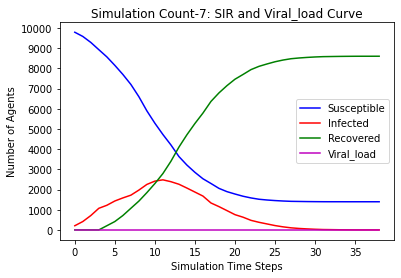

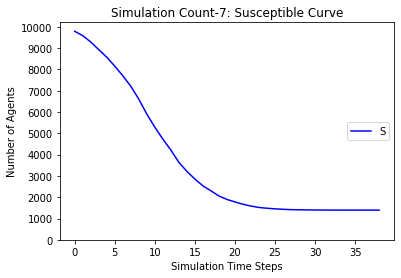

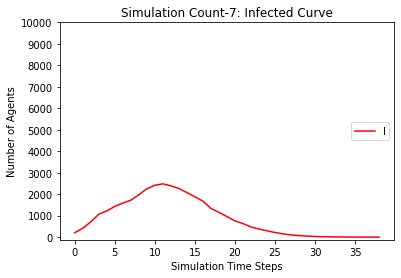

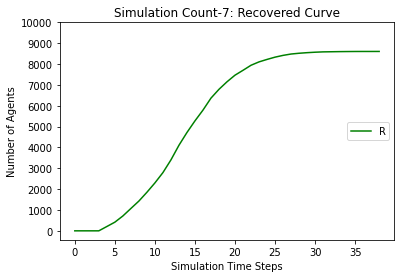

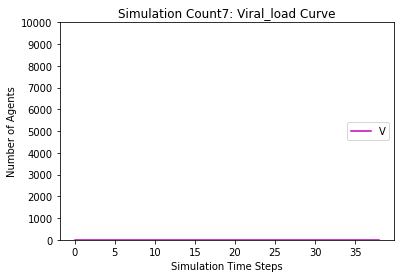

[9793, 9601, 9315, 8980, 8644, 8319, 7990, 7540, 7095, 6650, 6255, 5844, 5452, 5053, 4703, 4368, 4035, 3763, 3516, 3280, 3085, 2925, 2809, 2688, 2587, 2507, 2446, 2400, 2356, 2325, 2294, 2272, 2249, 2236, 2227, 2219, 2216, 2213, 2212, 2212, 2212, 2212, 2212]
[207, 399, 685, 1020, 1149, 1282, 1325, 1440, 1549, 1669, 1735, 1696, 1643, 1597, 1552, 1476, 1417, 1290, 1187, 1088, 950, 838, 707, 592, 498, 418, 363, 288, 231, 182, 152, 128, 107, 89, 67, 53, 33, 23, 15, 7, 4, 1, 0]
[0, 0, 0, 0, 207, 399, 685, 1020, 1356, 1681, 2010, 2460, 2905, 3350, 3745, 4156, 4548, 4947, 5297, 5632, 5965, 6237, 6484, 6720, 6915, 7075, 7191, 7312, 7413, 7493, 7554, 7600, 7644, 7675, 7706, 7728, 7751, 7764, 7773, 7781, 7784, 7787, 7788]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 67

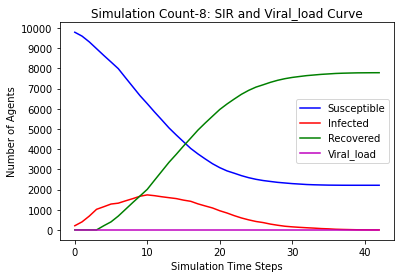

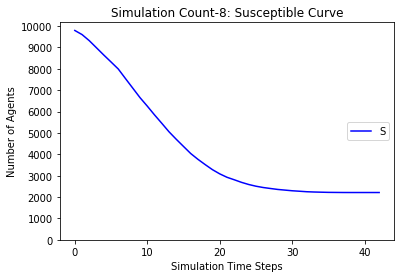

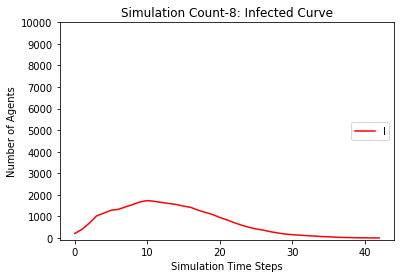

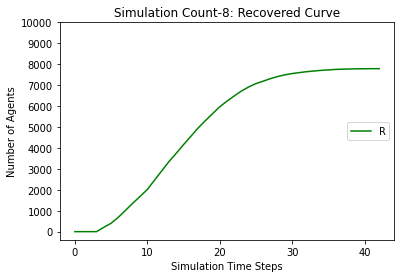

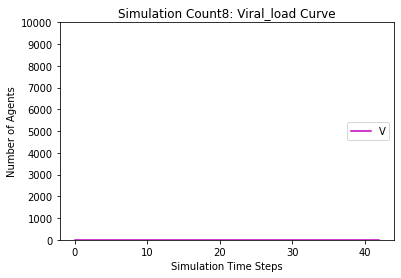

[9793, 9572, 9274, 8932, 8623, 8314, 7986, 7520, 7024, 6539, 6023, 5488, 4922, 4435, 3919, 3447, 3005, 2615, 2322, 2041, 1802, 1657, 1545, 1472, 1420, 1377, 1338, 1315, 1305, 1294, 1289, 1284, 1283, 1282, 1281, 1281, 1281, 1281, 1281]
[207, 428, 726, 1068, 1170, 1258, 1288, 1412, 1599, 1775, 1963, 2032, 2102, 2104, 2104, 2041, 1917, 1820, 1597, 1406, 1203, 958, 777, 569, 382, 280, 207, 157, 115, 83, 49, 31, 22, 12, 8, 3, 2, 1, 0]
[0, 0, 0, 0, 207, 428, 726, 1068, 1377, 1686, 2014, 2480, 2976, 3461, 3977, 4512, 5078, 5565, 6081, 6553, 6995, 7385, 7678, 7959, 8198, 8343, 8455, 8528, 8580, 8623, 8662, 8685, 8695, 8706, 8711, 8716, 8717, 8718, 8719]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305, 2972, 2664, 2377, 2170, 1996, 1877, 

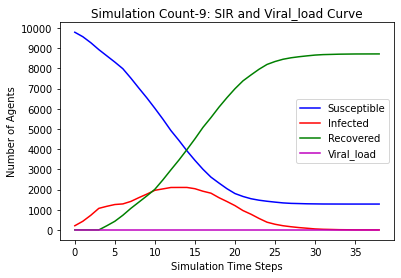

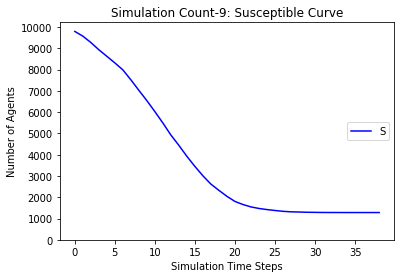

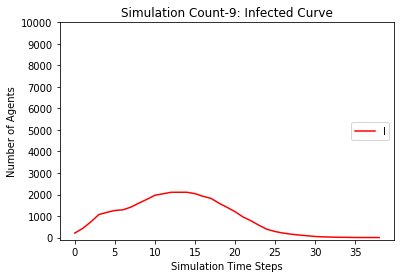

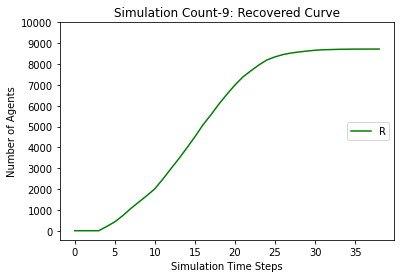

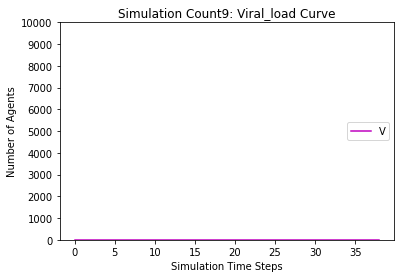

[9793, 9588, 9316, 8980, 8651, 8290, 7888, 7420, 6929, 6384, 5779, 5177, 4630, 4039, 3472, 2976, 2550, 2193, 1954, 1772, 1647, 1554, 1485, 1442, 1414, 1393, 1384, 1382, 1372, 1367, 1363, 1360, 1356, 1355, 1353, 1351, 1350, 1350, 1350, 1350, 1350]
[207, 412, 684, 1020, 1142, 1298, 1428, 1560, 1722, 1906, 2109, 2243, 2299, 2345, 2307, 2201, 2080, 1846, 1518, 1204, 903, 639, 469, 330, 233, 161, 101, 60, 42, 26, 21, 22, 16, 12, 10, 9, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 207, 412, 684, 1020, 1349, 1710, 2112, 2580, 3071, 3616, 4221, 4823, 5370, 5961, 6528, 7024, 7450, 7807, 8046, 8228, 8353, 8446, 8515, 8558, 8586, 8607, 8616, 8618, 8628, 8633, 8637, 8640, 8644, 8645, 8647, 8649, 8650]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9793, 9586, 9278, 8956, 8615, 8263, 7929, 7545, 7146, 6762, 6369, 5933, 5475, 5035, 4563, 4108, 3679, 3305

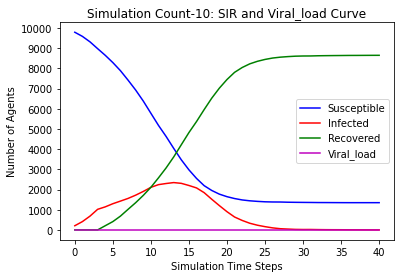

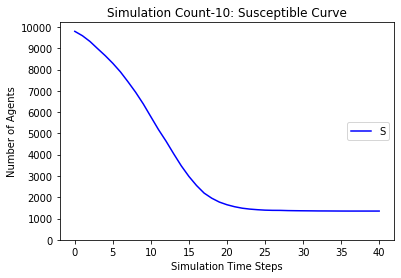

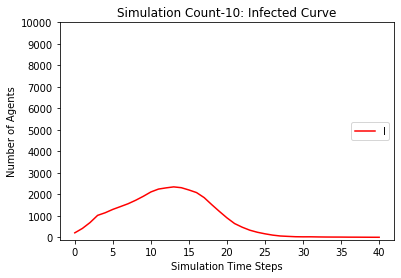

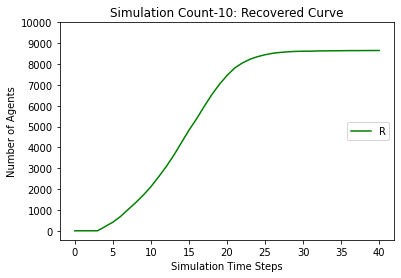

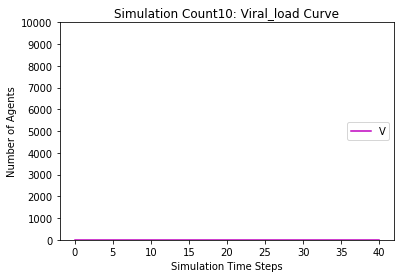

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

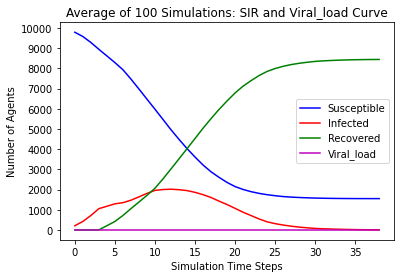

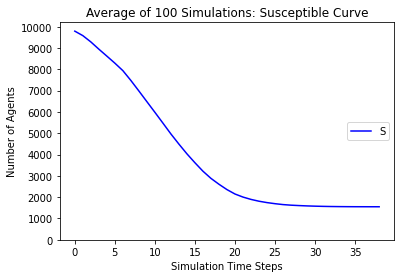

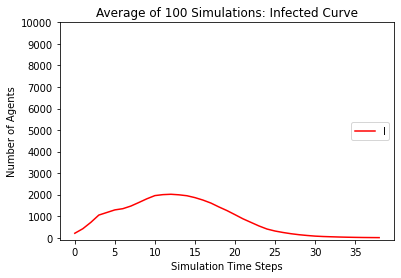

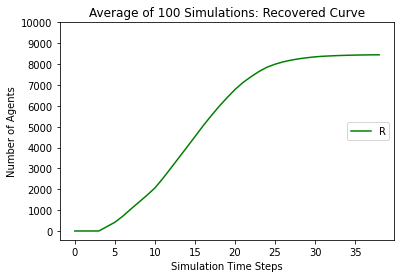

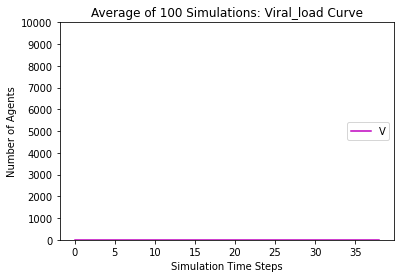

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
